# Student Mental Health: Exploratory Data Analysis Project

## Step 1: Import Libraries and Load the Dataset

In [505]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

In [506]:
# Load the dataset
mental_health = pd.read_csv('student_mental_health.csv')

## Step 2: Data Exploration and Cleaning

In [507]:
# Display basic information about the dataset
mental_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

In [508]:
# return the first 5 columns
mental_health.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [509]:
# check for null values
mental_health.isnull().sum()

Timestamp                                       0
Choose your gender                              0
Age                                             1
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

In [510]:
# drop null values()
mental_health.dropna(inplace=True)

In [511]:
# check for duplicates
mental_health.duplicated().sum()

0

In [512]:
# Drop the an unnecessary column
mental_health.drop('Timestamp', axis=1, inplace=True)

In [513]:
# Rename the columns
new_column_names = {
    'Choose your gender': 'Gender',
    'What is your course?': 'Course',
    'Your current year of Study': 'Year_of_Study',
    'What is your CGPA?': 'CGPA',
    'Marital status':'Marital_status',
    'Do you have Depression?': 'Depression',
    'Do you have Anxiety?': 'Anxiety',
    'Do you have Panic attack?': 'Panic_attack',
    'Did you seek any specialist for a treatment?': 'Treatment_Sought'
}

mental_health.rename(columns=new_column_names, inplace=True)

In [514]:
# review the new column names
mental_health.head(0)

,Gender,Age,Course,Year_of_Study,CGPA,Marital_status,Depression,Anxiety,Panic_attack,Treatment_Sought


In [515]:
# explore the unique values of the 'Gender' column
mental_health['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [516]:
# explore the unique values of the 'Course' column
mental_health['Course'].unique()

array(['Engineering', 'Islamic education', 'BIT', 'Laws', 'Mathemathics',
       'Pendidikan islam', 'BCS', 'Human Resources', 'Irkhs',
       'Psychology', 'KENMS', 'Accounting ', 'ENM', 'Marine science',
       'KOE', 'Banking Studies', 'Business Administration', 'Law',
       'KIRKHS', 'Usuluddin ', 'TAASL', 'Engine', 'ALA',
       'Biomedical science', 'koe', 'Kirkhs', 'BENL', 'Benl', 'IT', 'CTS',
       'engin', 'Econs', 'MHSC', 'Malcom', 'Kop', 'Human Sciences ',
       'Biotechnology', 'Communication ', 'Diploma Nursing',
       'Pendidikan Islam ', 'Radiography', 'psychology', 'Fiqh fatwa ',
       'DIPLOMA TESL', 'Koe', 'Fiqh', 'Islamic Education', 'Nursing ',
       'Pendidikan Islam'], dtype=object)

In [517]:
# Mapping dictionary to categorize courses
course_mapping = {
    'Engineering': 'Engineering',
    'Islamic education': 'Religious Studies',
    'BIT': 'IT',
    'Laws': 'Law',
    'Mathemathics': 'Mathematics',
    'Pendidikan islam': 'Religious Studies',
    'BCS': 'IT',
    'Human Resources': 'Business',
    'Irkhs': 'Religious Studies',
    'Psychology': 'Social Sciences',
    'KENMS': 'Business',
    'Accounting ': 'Business',
    'ENM': 'Engineering',
    'Marine science': 'Environmental Science',
    'KOE': 'Engineering',
    'Banking Studies': 'Business',
    'Business Administration': 'Business',
    'Law': 'Law',
    'KIRKHS': 'Religious Studies',
    'Usuluddin ': 'Religious Studies',
    'TAASL': 'Language Studies',
    'Engine': 'Engineering',
    'ALA': 'Language Studies',
    'Biomedical science': 'Medical Science',
    'koe': 'Engineering',
    'Kirkhs': 'Religious Studies',
    'BENL': 'Language Studies',
    'Benl': 'Language Studies',
    'IT': 'IT',
    'CTS': 'IT',
    'engin': 'Engineering',
    'Econs': 'Economics',
    'MHSC': 'Medical Science',
    'Malcom': 'Media and Communication',
    'Kop': 'Language Studies',
    'Human Sciences ': 'Social Sciences',
    'Biotechnology': 'Biotechnology',
    'Communication ': 'Media and Communication',
    'Diploma Nursing': 'Medical Science',
    'Pendidikan Islam ': 'Religious Studies',
    'Radiography': 'Medical Science',
    'psychology': 'Social Sciences',
    'Fiqh fatwa ': 'Religious Studies',
    'DIPLOMA TESL': 'Language Studies',
    'Koe': 'Engineering',
    'Fiqh': 'Religious Studies',
    'Islamic Education': 'Religious Studies',
    'Nursing ': 'Medical Science',
    'Pendidikan Islam': 'Religious Studies',
}

# Create a new column with the categorized groups
mental_health['Course_Category'] = mental_health['Course'].map(course_mapping)

In [518]:
# display the data
mental_health.head()

,Gender,Age,Course,Year_of_Study,CGPA,Marital_status,Depression,Anxiety,Panic_attack,Treatment_Sought,Course_Category
0,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No,Engineering
1,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No,Religious Studies
2,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No,IT
3,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No,Law
4,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No,Mathematics


In [519]:
# check the values of the 'Course_Category' column 
mental_health['Course_Category'].unique()

array(['Engineering', 'Religious Studies', 'IT', 'Law', 'Mathematics',
       'Business', 'Social Sciences', 'Environmental Science',
       'Language Studies', 'Medical Science', 'Economics',
       'Media and Communication', 'Biotechnology'], dtype=object)

In [520]:
# drop the column 'Course'
mental_health.drop('Course', axis=1, inplace=True)

In [521]:
# investigate the unique values of the 'Course' column
mental_health.Year_of_Study.unique()

array(['year 1', 'year 2', 'Year 1', 'year 3', 'year 4', 'Year 2',
       'Year 3'], dtype=object)

In [522]:
# Create a new column 'Numeric_Year_of_study' with extracted numeric values
mental_health['Numeric_Year_of_Study'] = mental_health['Year_of_Study'].str.extract('(\d+)')

# Convert the new column to numeric data type
mental_health['Numeric_Year_of_Study'] = mental_health['Numeric_Year_of_Study'].astype(int)

In [524]:
# check the new values of the column
mental_health['Numeric_Year_of_Study'].unique()

array([1, 2, 3, 4])

In [525]:
# ensure the data type of the new column
mental_health['Numeric_Year_of_Study'].dtype

dtype('int64')

In [526]:
#drop the column 'Year_of_Study'
mental_health.drop('Year_of_Study', axis=1, inplace=True)
# rename the column 'Numeric_Year_of_Study'
mental_health.rename(columns={'Numeric_Year_of_Study':'Year_of_Study'}, inplace=True)

In [527]:
mental_health.CGPA.unique()

array(['3.00 - 3.49', '3.50 - 4.00', '3.50 - 4.00 ', '2.50 - 2.99',
       '2.00 - 2.49', '0 - 1.99'], dtype=object)

In [528]:
# Two values in the column are repeated as unique: '3.50 - 4.00'
# Trim leading and trailing whitespaces in the 'CGPA' column
mental_health['CGPA'] = mental_health['CGPA'].str.strip()

# Check unique values in the 'CGPA' column
mental_health['CGPA'].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '2.50 - 2.99', '2.00 - 2.49',
       '0 - 1.99'], dtype=object)

In [529]:
# Define the CGPA categories in the desired order
cgpa_categories = ['0 - 1.99', '2.00 - 2.49', '2.50 - 2.99', '3.00 - 3.49', '3.50 - 4.00']

# Convert the 'CGPA' column to a categorical type with specified categories and order
mental_health['CGPA'] = pd.Categorical(mental_health['CGPA'], categories=cgpa_categories, ordered=True)

In [530]:
# Check the unique values in the 'CGPA' column
mental_health['CGPA'].unique()

['3.00 - 3.49', '3.50 - 4.00', '2.50 - 2.99', '2.00 - 2.49', '0 - 1.99']
Categories (5, object): ['0 - 1.99' < '2.00 - 2.49' < '2.50 - 2.99' < '3.00 - 3.49' < '3.50 - 4.00']

In [531]:
# Check the unique values in the 'Marital_status' column
mental_health['Marital_status'].unique()

array(['No', 'Yes'], dtype=object)

In [532]:
# Check the unique values in the 'Depression' column
mental_health['Depression'].unique()

array(['Yes', 'No'], dtype=object)

In [533]:
# Check the unique values in the 'Anxiety' column
mental_health['Anxiety'].unique()

array(['No', 'Yes'], dtype=object)

In [534]:
# Check the unique values in the 'Panic_attack' column
mental_health['Panic_attack'].unique()

array(['Yes', 'No'], dtype=object)

In [535]:
# Check the unique values in the 'Treatment_Sought' column
mental_health['Treatment_Sought'].unique()

array(['No', 'Yes'], dtype=object)

In [536]:
# review the data
mental_health.head()

,Gender,Age,CGPA,Marital_status,Depression,Anxiety,Panic_attack,Treatment_Sought,Course_Category,Year_of_Study
0,Female,18.0,3.00 - 3.49,No,Yes,No,Yes,No,Engineering,1
1,Male,21.0,3.00 - 3.49,No,No,Yes,No,No,Religious Studies,2
2,Male,19.0,3.00 - 3.49,No,Yes,Yes,Yes,No,IT,1
3,Female,22.0,3.00 - 3.49,Yes,Yes,No,No,No,Law,3
4,Male,23.0,3.00 - 3.49,No,No,No,No,No,Mathematics,4


## Step 3. Understanding the Demographics

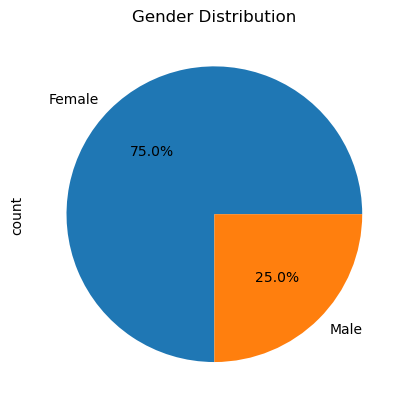

<Figure size 640x480 with 0 Axes>

In [537]:
# gender distribution 
mental_health['Gender'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()
plt.clf()

The majority of students, accounting for 75.0%, are males, indicating a predominant male representation among the surveyed student population.

In [538]:
# distribution of gender among the students
# Average age of students
avg_age = mental_health['Age'].mean()
print(f"Average Age: {avg_age}")

Average Age: 20.53


In [539]:
# Median of age of students
median_age = mental_health['Age'].median()
print(f"Median of Ages: {median_age}")

Median of Ages: 19.0


In [540]:
# Range of ages of students
range_of_ages = mental_health['Age'].max() - mental_health['Age'].min()
print(f"Range of Ages: {range_of_ages}")

Range of Ages: 6.0


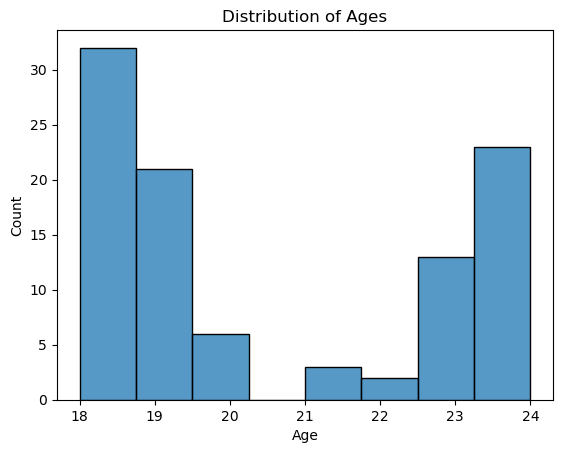

<Figure size 640x480 with 0 Axes>

In [541]:
# Histogram for Ages
sns.histplot(x='Age', data=mental_health)
plt.title('Distribution of Ages')
plt.show()
plt.clf()

The histogram provides a visual representation of the ***distribution of ages among the students***. Notably, the distribution appears bimodal, featuring two prominent peaks skewed towards each other. The highest frequency occurs at ages 18 and 24 years old, indicating a concentration of students within these age brackets. This bimodal pattern suggests the presence of two distinct age groups within the dataset.

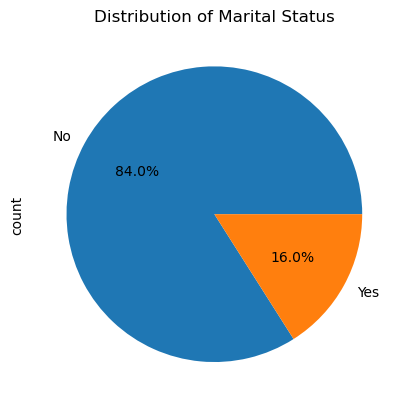

<Figure size 640x480 with 0 Axes>

In [542]:
# Marital status distribution amonth the students
mental_health['Marital_status'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Marital Status')
plt.show()
plt.clf()

The pie chart illustrates that the majority of students (84.0%) are not in any marital status, indicating a significant portion of the surveyed individuals falls into this category.

## Step 4. Academic Profile Exploration

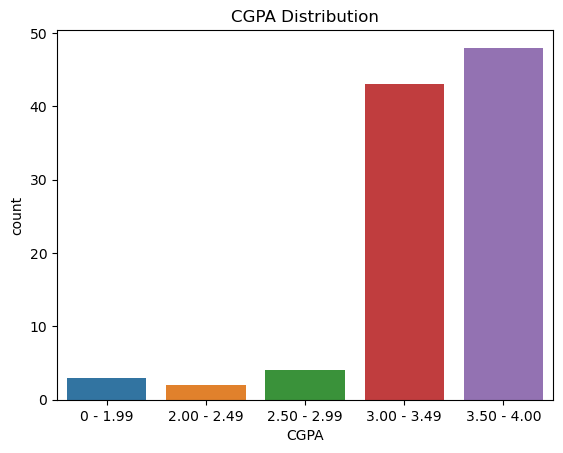

<Figure size 640x480 with 0 Axes>

In [543]:
# Bar chart for Cumulative Grade Point Average (CGPA)
sns.countplot(data=mental_health, x='CGPA')
plt.title('CGPA Distribution')
plt.show()
plt.clf()

In [544]:
# percentage distribution of each category
mental_health['CGPA'].value_counts(normalize=True) * 100

CGPA
3.50 - 4.00    48.0
3.00 - 3.49    43.0
2.50 - 2.99     4.0
0 - 1.99        3.0
2.00 - 2.49     2.0
Name: proportion, dtype: float64

The majority of students have a CGPA result in the range of 3.50 - 4.00, constituting 48.0% of the total. Additionally, a significant percentage of students, 43.0%, fall into the CGPA range of 3.00 - 3.49.

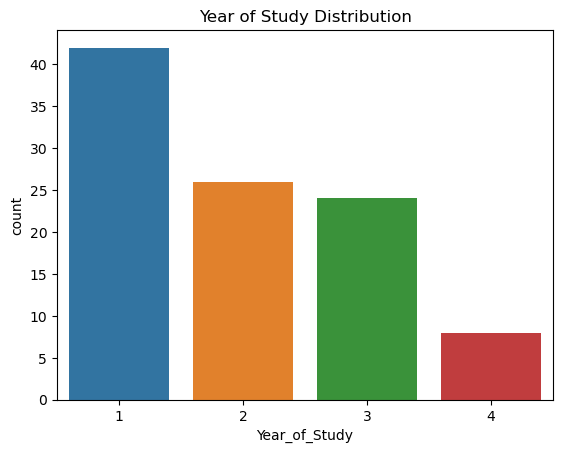

<Figure size 640x480 with 0 Axes>

In [545]:
# bar chart for Year of Study
sns.countplot(data=mental_health, x = 'Year_of_Study')
plt.title('Year of Study Distribution')
plt.show()
plt.clf()

The chart illustrates the distribution of students across different academic years. Over 40% of the students are in their 1st year of study, approximately 25% are in the 2nd year, and another 25% are in the 3rd year. A minority of students, less than 10%, are in their fourth year of study.

In [546]:
# the distribution of the the values of the 'Course_Category' column 
mental_health['Course_Category'].value_counts(normalize=True) * 100

Course_Category
IT                         29.0
Engineering                27.0
Religious Studies          11.0
Medical Science             8.0
Language Studies            7.0
Business                    5.0
Social Sciences             4.0
Law                         3.0
Media and Communication     2.0
Mathematics                 1.0
Environmental Science       1.0
Economics                   1.0
Biotechnology               1.0
Name: proportion, dtype: float64

## Step 5. Exploring the relationship between Cumulative Grade Point Average (CGPA) and Depression

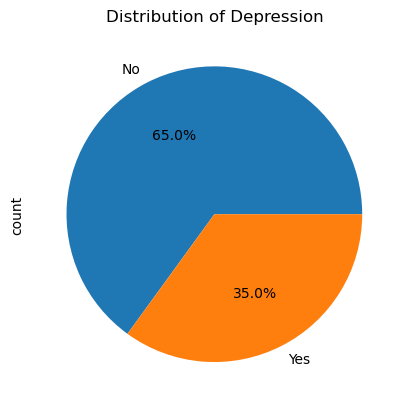

<Figure size 640x480 with 0 Axes>

In [547]:
# Depression distribution amonth the students
mental_health['Depression'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Depression')
plt.show()
plt.clf()

As the majority of the students have grades between 3.00 - 4.00, I'll compare them according to the grade level, dividing into `low_grade` (3.00-3.49) and `high_grade` (3.50 - 4.00).

In [548]:
# Filter the data
grade_filt = mental_health[mental_health['CGPA'].isin(['3.00 - 3.49', '3.50 - 4.00'])].copy()

# Create a new column 'high_grade' in the filtered DataFrame
grade_filt['high_grade'] = grade_filt['CGPA'].isin(['3.50 - 4.00'])

grade_filt['high_grade'] = grade_filt['high_grade'].map({True: 'Yes', False: 'No'})


In [549]:
# calculate a contingency table of frequencies to help them determine if categorical variables are associated
high_grade_depression_freq = pd.crosstab(grade_filt['high_grade'],grade_filt['Depression'])
high_grade_depression_freq

Depression,No,Yes
high_grade,,
No,24,19
Yes,35,13


In [550]:
# convert the table of frequencies to a table of proportions
high_grade_depression_proportions = high_grade_depression_freq/len(grade_filt)
high_grade_depression_proportions

Depression,No,Yes
high_grade,,
No,0.263736,0.208791
Yes,0.384615,0.142857


In [551]:
# calculate the expected contingency table (if there were no association) and the Chi-Square statistic
chi2, pval, dof, expected = chi2_contingency(high_grade_depression_freq)
print("Expected frequencies:", expected)
print("Chi-squared:", chi2)
print("P-value:", pval)
print("Degrees of freedom:", dof)

Expected frequencies: [[27.87912088 15.12087912]
 [31.12087912 16.87912088]]
Chi-squared: 2.208106161620517
P-value: 0.13728711683063424
Degrees of freedom: 1


The chi-squared test results in a statistic of approximately 2.21 with degrees of freedom, indicating a weak association between 'high Cumulative Grade Point Average (CGPA)' and 'Depression' among the examined students. The p-value associated with this test is approximately 0.137. Since the p-value is greater than the significance level (e.g., 0.05), we fail to reject the null hypothesis. This suggests that there is no evidence of an association between 'high CGPA' and 'Depression.' It's important to note that while the association is statistically significant, the chi-squared value of 2.21 indicates a relatively weak strength of association.

## Conclusion

- The examined group is predominantly composed of females (75.0%), exhibiting a bimodal distribution of ages with the highest frequency observed at ages 18 and 24 years old.
The majority of students are not married (84.0%).
- More than 90.0% of students have a Cumulative Grade Point Average (CGPA) within the range of 3.00 - 4.00.
- Over 40% of students are in their 1st year of study, approximately 25% are in the 2nd year, and another 25% are in the 3rd year. A minority of students, less than 10%, are in their fourth year of study.
- The exploration of the association between grades and the occurrence of depression indicated that we can't reject the null hypothesis, and there's no evidence of a significant association. It's important to note that the sample, consisting of only 100 students, may not be very representative due to its dispersity and limited size.